In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.dropna(axis=1, inplace=True)

In [9]:
df.columns = ["Target", "Text"]

In [10]:
df.sample(5)

,Target,Text
1881,ham,Ok.. ÌÏ finishing soon?
5247,ham,Gud ni8 dear..slp well..take care..swt dreams....
3440,spam,Get a FREE mobile video player FREE movie. To ...
2026,ham,"Nah man, my car is meant to be crammed full of..."
2174,ham,See? I thought it all through


In [11]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df.Target = labelEncoder.fit_transform(df.Target)

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

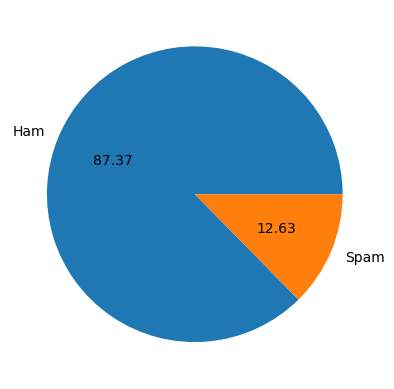

In [15]:
plt.pie(df.Target.value_counts(), labels=["Ham", "Spam"], autopct="%.2f")
plt.show()

In [16]:
import nltk

In [17]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
df['num_chars'] = df.Text.apply(len)

In [19]:
df['num_words'] = df.Text.apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df['num_sentences'] = df.Text.apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(10)

,Target,Text,num_chars,num_words,num_sentences
1765,0,Hi this is yijue... It's regarding the 3230 te...,121,27,3
2665,0,R u meeting da ge at nite tmr?,30,9,1
1192,0,I was up all night too worrying about this app...,133,30,2
2171,0,I wont. So wat's wit the guys,29,9,2
4105,0,K then 2marrow are you coming to class.,39,9,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3598,0,Then wat r u doing now? Busy wif work?,38,11,2
1804,0,The bus leaves at &lt;#&gt;,29,11,1
2526,0,Do u noe how 2 send files between 2 computers?,46,11,1
732,0,Lol you won't feel bad when I use her money to...,80,20,1


In [21]:
df.groupby("Target")[['num_chars', 'num_words', 'num_sentences']].describe().T

Target                         0           1
num_chars     count  4516.000000  653.000000
              mean     70.459256  137.891271
              std      56.358207   30.137753
              min       2.000000   13.000000
              25%      34.000000  132.000000
              50%      52.000000  149.000000
              75%      90.000000  157.000000
              max     910.000000  224.000000
num_words     count  4516.000000  653.000000
              mean     17.120903   27.667688
              std      13.493725    7.008418
              min       1.000000    2.000000
              25%       8.000000   25.000000
              50%      13.000000   29.000000
              75%      22.000000   32.000000
              max     220.000000   46.000000
num_sentences count  4516.000000  653.000000
              mean      1.799601    2.967841
              std       1.278465    1.483201
              min       1.000000    1.000000
              25%       1.000000    2.000000
              50%       1.000000    3.000000
              75%       2.000000    4.000000
              max      28.000000    8.000000

In [22]:
import seaborn as sns

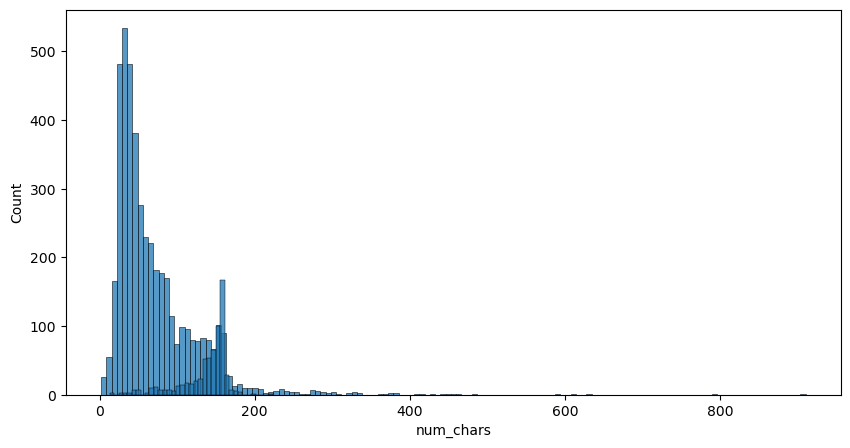

In [23]:
plt.figure(figsize=(10, 5))
df.groupby("Target").apply(lambda x: sns.histplot(x["num_chars"]))
plt.show()

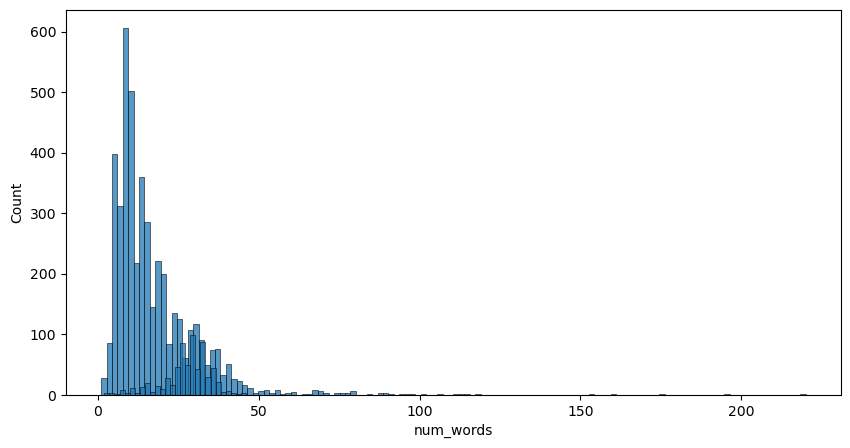

In [24]:
plt.figure(figsize=(10, 5))
df.groupby("Target").apply(lambda x: sns.histplot(x["num_words"]))
plt.show()

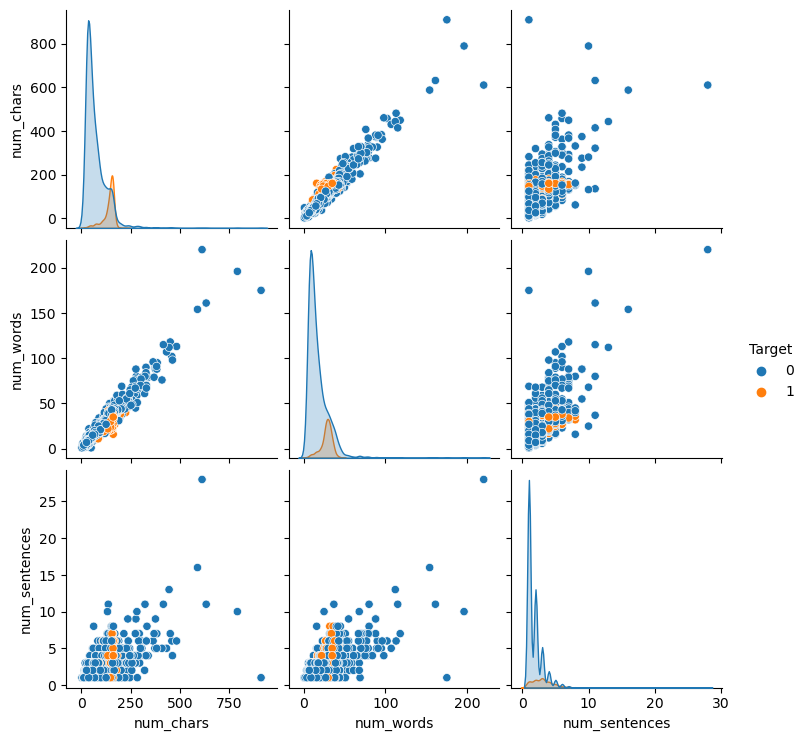

In [25]:
sns.pairplot(df, hue="Target")
plt.show()

<AxesSubplot:>

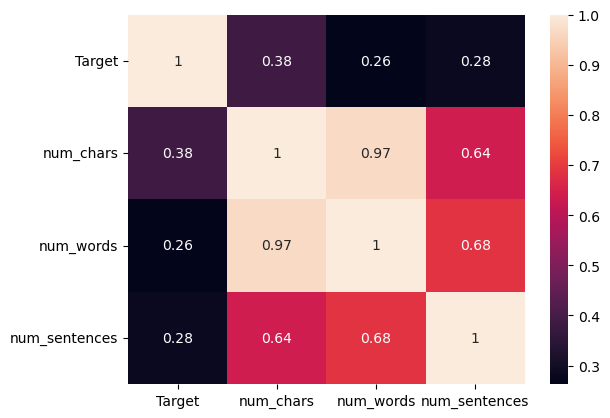

In [27]:
sns.heatmap(df[["Target", "num_chars", "num_words", "num_sentences"]].corr(), annot=True)

In [28]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
def text_transformation(text: str):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = list(filter(lambda x: x.isalnum(), text))
    text = list(filter(lambda x: x not in stopwords.words('english'), text))
    ps = PorterStemmer()
    text = list(map(lambda x: ps.stem(x), text))
    return " ".join(text)

In [30]:
text_transformation("You are so much lovingly good person, Harsh")

'much lovingli good person harsh'

In [31]:
df["text_transformed"] = df["Text"].apply(text_transformation)
df

,Target,Text,num_chars,num_words,num_sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [32]:
from collections import Counter
df.groupby("Target")["text_transformed"].apply(lambda x: pd.DataFrame(Counter(" ".join(x.tolist()).split()).most_common(10)))

0    1
Target              
0      0      u  883
       1     go  404
       2    get  349
       3     gt  288
       4     lt  287
       5      2  284
       6   come  275
       7    got  236
       8   know  236
       9   like  234
1      0   call  320
       1   free  191
       2      2  155
       3    txt  141
       4   text  122
       5      u  119
       6     ur  119
       7  mobil  114
       8   stop  104
       9  repli  103

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv = CountVectorizer()
tv = TfidfVectorizer()

In [34]:
X = tv.fit_transform(df.text_transformed).toarray()

In [35]:
X.shape

(5169, 6708)

In [36]:
y = np.array(df["Target"])
y

array([0, 0, 1, ..., 0, 0, 0])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [39]:
gnb.fit(train_X, train_Y)
pred_Y = gnb.predict(test_X)
print(accuracy_score(test_Y, pred_Y))
print(precision_score(test_Y, pred_Y))
print(f1_score(test_Y, pred_Y))

0.8636363636363636
0.5084033613445378
0.6318537859007832


In [40]:
mnb.fit(train_X, train_Y)
pred_Y = mnb.predict(test_X)
print(accuracy_score(test_Y, pred_Y))
print(precision_score(test_Y, pred_Y))
print(f1_score(test_Y, pred_Y))

0.9613152804642167
0.9906542056074766
0.8412698412698413


In [41]:
bnb.fit(train_X, train_Y)
pred_Y = bnb.predict(test_X)
print(accuracy_score(test_Y, pred_Y))
print(precision_score(test_Y, pred_Y))
print(f1_score(test_Y, pred_Y))

0.9661508704061895
0.9661016949152542
0.8669201520912548


pipeline

In [42]:
from sklearn.pipeline import Pipeline
class TextTransform():    
    def text_transformation(self, text: str):
        text = text.lower()
        text = nltk.word_tokenize(text)
        text = list(filter(lambda x: x.isalnum(), text))
        text = list(filter(lambda x: x not in stopwords.words('english'), text))
        ps = PorterStemmer()
        text = list(map(lambda x: ps.stem(x), text))
        return " ".join(text)
    
    def fit(self, df, y=None):
        return self
    
    def transform(self, df, y=None):
        return [self.text_transformation(text) for text in df]

In [43]:
pipeline = Pipeline([
    ("text-transfom", TextTransform()),
    ("vectoizer", TfidfVectorizer()),
    ("model", MultinomialNB())
])

In [44]:
pipeline.fit(df.Text, df.Target)

Pipeline(steps=[('text-transfom',
                 <__main__.TextTransform object at 0x00000228CCA0CBB0>),
                ('vectoizer', TfidfVectorizer()), ('model', MultinomialNB())])

In [45]:
preds = pipeline.predict(df.Text)
precision_score(df.Target, preds)

1.0

In [46]:
from pickle import dump, load